
# Gráficos de entropía

Metamos los gráficos que necesitamos en esta notebook

In [1]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import contrastes
import seaborn as sns


In [2]:
from contrastes.lists import add_info

df = contrastes.read_occurrence_dataframe("output/provinces_words.csv", filter_words=True)


add_info(df)

/home/jmperez/projects/contrastes/notebooks/contrastes/processing.py:147: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cant_palabras = cant_palabras
/home/jmperez/projects/contrastes/notebooks/contrastes/processing.py:148: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cant_personas = cant_personas


Calculating information values...
Calculating ranks...
Adding fnorms...


In [3]:
df.sort_values("rank_palabras")[:10][["cant_palabra", "cant_usuarios"]]

,cant_palabra,cant_usuarios
palabra,,
ushuaia,38316,2567
rioja,62060,4017
chivilcoy,12831,961
bragado,9586,662
viedma,20018,1794
logroño,6482,250
chepes,6808,273
oberá,8546,804
cldo,10356,1009


In [4]:
from scipy.stats import entropy

df["entropia_usuarios"] = df[df.cant_personas].apply(entropy, axis=1, raw=True)
df["entropia_palabras"] = df[df.cant_palabras].apply(entropy, axis=1, raw=True)

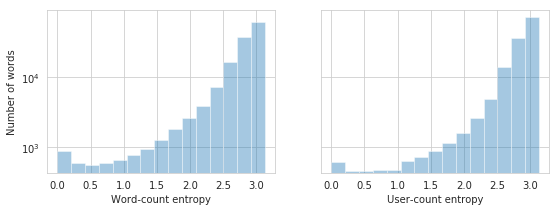

In [5]:
plt.rcParams["figure.figsize"] = (9,3)

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, sharey=True)

g = sns.distplot(df["entropia_palabras"], bins=15, kde=False, ax=axes[0])
g.semilogy()
g.set_xlabel("Word-count entropy")
g.set_ylabel("Number of words")
g.grid(True)

g = sns.distplot(df["entropia_usuarios"], bins=15, kde=False, ax=axes[1])
g.set_xlabel("User-count entropy")

g.grid(True)



In [6]:
fig.savefig("../output/figures/entropies.png", bbox_inches='tight')

# Gráficos de Entropía + Posición 

Los colores de los gráficos los vamos a calcular sobre los logaritmos del ranking, ya que no nos interesa demasiado la diferencia entre números grandes de ranking (20 mil y 25 mil son casi lo mismo) pero sí entre valores chiquitos...

In [7]:


df["norm_palabra"] = np.log(df.cant_palabra)
df["norm_palabra"] /= df["norm_palabra"].max()

df["norm_personas"] = np.log(df.cant_usuarios)
df["norm_personas"] /= df["norm_personas"].max()

df["log_rank_personas"] = np.log(df.rank_personas)
df["log_rank_palabras"] = np.log(df.rank_palabras)
df["log_rank_palper"] = np.log(df.rank_palper)

Text(0.5,1,'Word-Count Information Value on User-Count axes')

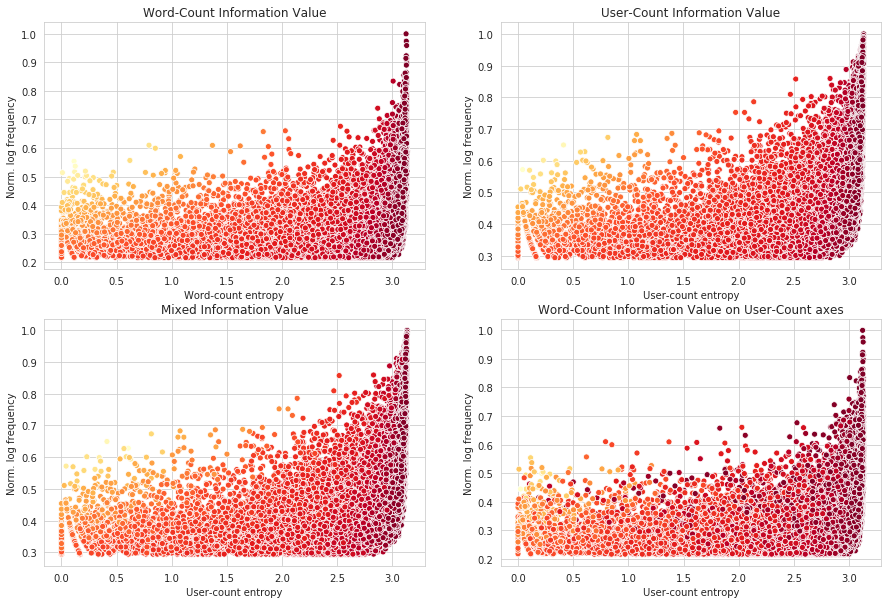

In [32]:
plt.rcParams["figure.figsize"] = (15,10)

sample_df = df.sample(frac=0.5)

fig, axes = plt.subplots(2, 2)

g = sns.scatterplot(y="norm_palabra", x="entropia_palabras", data=sample_df,
                hue="log_rank_palabras", palette="YlOrRd", legend=False, ax=axes[0][0])

g.set_xlabel("Word-count entropy")
g.set_ylabel("Norm. log frequency")
g.set_title("Word-Count Information Value")

g = sns.scatterplot(y="norm_personas", x="entropia_usuarios", data=sample_df,
                hue="log_rank_personas", palette="YlOrRd", legend=False, ax=axes[0][1])

g.set_xlabel("User-count entropy")
g.set_ylabel("Norm. log frequency")

g.set_title("User-Count Information Value")


g = sns.scatterplot(y="norm_personas", x="entropia_usuarios", data=sample_df,
                hue="log_rank_palper", palette="YlOrRd", legend=False, ax=axes[1][0])

g.set_xlabel("User-count entropy")
g.set_ylabel("Norm. log frequency")
g.set_title("Mixed Information Value")


g = sns.scatterplot(y="norm_palabra", x="entropia_palabras", data=sample_df,
                hue="log_rank_personas", palette="YlOrRd", legend=False, ax=axes[1][1])

g.set_xlabel("User-count entropy")
g.set_ylabel("Norm. log frequency")
g.set_title("Word-Count Information Value on User-Count axes")




In [29]:
g.figure.savefig("../output/figures/entropy_log_rank.png", bbox_inches='tight')

## Gráfico de Information Value

Volvemos a cargar el dataset para cargar todas las palabras.

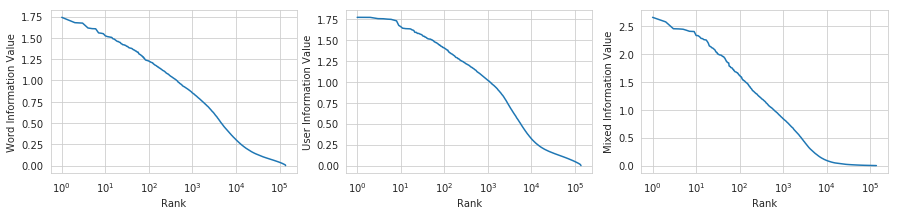

In [35]:
plt.rcParams["figure.figsize"] = (15, 3)
fig, axes = plt.subplots(1, 3)

def decay_plot(df, base, ax=None, label=None, threshold=1e7):
    
    rank = "rank_" + base
    ival = "ival_" + base
    reduced_df = df[df[rank] < threshold].copy()
    reduced_df.sort_values(rank, ascending=True, inplace=True)
    reduced_df.plot(x=rank, y=ival, logx=True, ax=ax, legend=False)
    
    ax.set_xlabel("Rank")
    ax.set_ylabel(label)
    
decay_plot(df, "palabras", ax=axes[0], label="Word Information Value")
decay_plot(df, "personas", ax=axes[1], label="User Information Value")
decay_plot(df, "palper", ax=axes[2], label="Mixed Information Value")

In [37]:
fig.savefig("../output/figures/information_value_decay.png", bbox_inches='tight')